In [1]:
import pynufft.tests as tests
import numpy as np
import matplotlib.pyplot as plt
    
from pynufft.nufft import NUFFT_cpu, NUFFT_hsa

# in order to use custom modules in parent path
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from mfilter.implementations.simulate import SimulateSignal

%matplotlib inline
tests.test_installation()

ModuleNotFoundError: No module named 'pynufft'

In [6]:
from pynufft.nufft import NUFFT_cpu, NUFFT_hsa

In [7]:
NufftObj = NUFFT_cpu()

[97.65624999999999, 292.96874999999994]


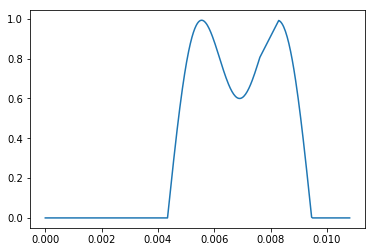

Showing the shifted k-space spectrum


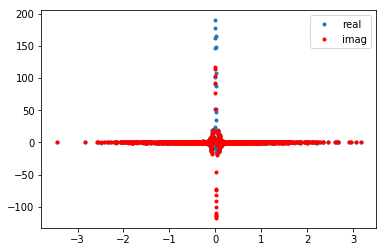

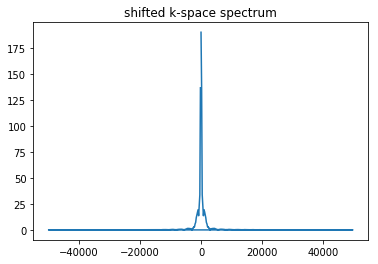

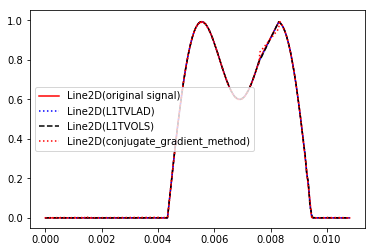

In [48]:
om = np.random.randn(512 * 2,1)
 
Nd = (256 * 2,) # time grid, tuple
Kd = (512 * 2,) # frequency grid, tuple
Jd = (7,) # interpolator 

NufftObj = NUFFT_cpu()

NufftObj.plan(om, Nd, Kd, Jd)


n_samples = 256 * 2
underlying_delta = 0.00001
min_freq = 0.5 / (n_samples * underlying_delta) 
freq = [min_freq, min_freq * 3]
print(freq)
weights=[1, 0.4]
config="mix1"
noise_level=0.2
simulated = SimulateSignal(n_samples, freq, weights=weights, noise_level=noise_level,
                           dwindow="tukey", underlying_delta=underlying_delta)

# get the times
times = simulated.get_times(configuration=config)
temp = simulated.get_data(pos_start_peaks=200, n_peaks=0.5, with_noise=False,
                          configuration=config)
temp = np.abs(temp)

plt.plot(times, temp)
plt.show()


nufft_freq_data =NufftObj.forward(temp)
plt.plot(om,nufft_freq_data.real,'.', label='real')
plt.plot(om,nufft_freq_data.imag,'r.', label='imag')
plt.legend()

restore_time = NufftObj.solve(nufft_freq_data,'cg', maxiter=30)
restore_time1 = NufftObj.solve(nufft_freq_data,'L1TVLAD', maxiter=30,rho=1)
restore_time2 = NufftObj.solve(nufft_freq_data,'L1TVOLS', maxiter=30,rho=1)

plt.figure()
# shifted_kspectrum = np.fft.fftshift(np.fft.fft(np.fft.fftshift(restore_time)))
shifted_kspectrum = np.fft.fft(restore_time)
freqs = np.fft.fftfreq(len(restore_time), d=underlying_delta)
#     print('getting the k-space spectrum, shape =',shifted_kspectrum.shape)
print('Showing the shifted k-space spectrum')

plt.plot(freqs, abs(shifted_kspectrum))
# plt.xlim([240, 280])
plt.title('shifted k-space spectrum')


plt.figure()
im1,=plt.plot(times, np.abs(temp),'r',label='original signal')
im2,=plt.plot(times, np.abs(restore_time1),'b:',label='L1TVLAD')
im3,=plt.plot(times, np.abs(restore_time2),'k--',label='L1TVOLS')
im4,=plt.plot(times, np.abs(restore_time),'r:',label='conjugate_gradient_method')
plt.legend([im1, im2, im3,im4])
plt.show()

In [ ]:
time_data = numpy.zeros(256, )
time_data[96:128+32] = 1.0
plt.plot(time_data)
plt.ylim(-1,2)
plt.show()

In [1]:
from pynfft import NFFT, Solver

ImportError: No module named 'pynfft'